<a href="https://colab.research.google.com/github/Muzi-HS/2023ML/blob/main/%EB%8C%80%EB%B0%95%EB%B2%84%EC%A0%84_%EC%97%90%EC%8A%A4%ED%8C%8C(%EC%96%BC%EA%B5%B4%EB%A7%8C)50%2C%20lr%3D%200.001%20drop%3D0.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

구글드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


한글 폰트

In [2]:
# 한글 폰트 설치하기 (꼭! 설치가 완료되면 [런타임 다시 시작]을 누르고 다시 실행하기)
!apt install fonts-nanum -y
!pip install koreanize-matplotlib


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (3,862 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 122542 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 77.5 MB/s eta 0:00:00


In [3]:

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정하기
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
#matplotlib.font_manager._rebuild()


현재 위치 확인

In [4]:
import koreanize_matplotlib
!pwd

/content


데이터 셋 구성 함수

In [5]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
import os
import shutil

directory_list = [
    './custom_dataset/train/',
    './custom_dataset/test/',
    './custom_dataset/val/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt, val_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir('/content/drive/MyDrive/image2/' + query):
        if cnt < train_cnt:
            shutil.copyfile('/content/drive/MyDrive/image2/'+ query + '/' + file_name, './custom_dataset/train/' + query + '/' + file_name)

            print(f'[Train Dataset] {file_name}')

            for i in range(1,6):
                image_path = '/content/drive/MyDrive/image2/'+ query + '/' + file_name
                image = cv2.imread(image_path)
                save_dir = './custom_dataset/train/' + query
                image_name = 'image' + str(cnt * train_cnt + i) + '.jpg'
                cv2.imwrite(os.path.join(save_dir, image_name), image)

        elif cnt < train_cnt + val_cnt:
            print(f'[Validation Dataset] {file_name}')
            shutil.copyfile('/content/drive/MyDrive/image2/'+ query + '/' + file_name, './custom_dataset/val/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.copyfile('/content/drive/MyDrive/image2/'+ query + '/' + file_name, './custom_dataset/test/' + query + '/' + file_name)
        cnt += 1
    #shutil.rmtree(query)


데이터 셋 삭제

In [7]:
# 이미지 데이터셋 디렉토리 경로
dataset_directory = './custom_dataset'

# 데이터셋 삭제 함수
def delete_dataset():
    # 데이터셋 디렉토리 삭제
    shutil.rmtree(dataset_directory)

# 데이터셋 삭제 함수 호출
delete_dataset()

데이터셋 적용하기

In [8]:
# /content/drive/MyDrive/image


## 블핑 버전

query = 'Giselle'
dataset_split(query, 20, 5)

query = 'Karina'
dataset_split(query, 20, 5)

query = 'NingNing'
dataset_split(query, 20, 5)

query = 'Winter'
dataset_split(query, 20, 5)




## 에스파 버전

# query = '닝닝'
# dataset_split(query, 20, 5)

# query = '윈터'
# dataset_split(query, 20, 5)

# query = '지젤'
# dataset_split(query, 20, 5)

# query = '카리나'
# dataset_split(query, 20, 5)



## 방탄 버전

# query = '방탄 진'
# dataset_split(query, 20, 5)

# query = '뷔'
# dataset_split(query, 20, 5)

# query = '슈가'
# dataset_split(query, 20, 5)

# query = '정국'
# dataset_split(query, 20, 5)

# query = 'RM'
# dataset_split(query, 20, 5)

# query = '제이홉'
# dataset_split(query, 20, 5)

# query = '지민'
# dataset_split(query, 20, 5)



[Train Dataset] Giselle_1.jpg
[Train Dataset] Giselle_2.jpg
[Train Dataset] Giselle_3.jpg
[Train Dataset] Giselle_4.jpg
[Train Dataset] Giselle_5.jpg
[Train Dataset] Giselle_6.jpg
[Train Dataset] Giselle_7.jpg
[Train Dataset] Giselle_8.jpg
[Train Dataset] Giselle_9.jpg
[Train Dataset] Giselle_10.jpg
[Train Dataset] Giselle_11.jpg
[Train Dataset] Giselle_12.jpg
[Train Dataset] Giselle_13.jpg
[Train Dataset] Giselle_14.jpg
[Train Dataset] Giselle_15.jpg
[Train Dataset] Giselle_16.jpg
[Train Dataset] Giselle_17.jpg
[Train Dataset] Giselle_18.jpg
[Train Dataset] Giselle_19.jpg
[Train Dataset] Giselle_20.jpg
[Validation Dataset] Giselle_21.jpg
[Validation Dataset] Giselle_22.jpg
[Validation Dataset] Giselle_23.jpg
[Validation Dataset] Giselle_24.jpeg
[Validation Dataset] Giselle_25.jpg
[Test Dataset] Giselle_26.jpg
[Test Dataset] Giselle_27.jpg
[Test Dataset] Giselle_28.jpg
[Test Dataset] Giselle_29.jpg
[Test Dataset] Giselle_30.jpg
[Train Dataset] Karina_1.jpg
[Train Dataset] Karina_2..jpg

전이 학습을 위한 라이브러리 불러오기

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch import nn
import torchvision
from torchvision import datasets, models, transforms
import tensorflow as tf
import numpy as np
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

데이터 셋 불러오기

In [10]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(degrees=30), # 무작위 회전 (최대 30도)
    transforms.RandomResizedCrop((224, 224), scale=(0.8, 1.2), ratio=(0.8, 1.2)), # 무작위 크롭 및 확대축소 (크기: 224x224, 크기 비율: 0.8 ~ 1.2)
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)), # 무작위 이동 및 확대축소
    transforms.RandomHorizontalFlip(), # 무작위 수평 뒤집기
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])
transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

In [15]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의

data_dir = './custom_dataset'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
val_datasets = datasets.ImageFolder(os.path.join(data_dir, 'val'), transforms)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=5, shuffle=True, num_workers=4)
val_dataloader = torch.utils.data.DataLoader(val_datasets, batch_size=5, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=5, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('val 데이터셋 크기:', len(val_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 480
val 데이터셋 크기: 20
테스트 데이터셋 크기: 20
클래스: ['Giselle', 'Karina', 'NingNing', 'Winter']


데이터 셋이 제대로 불러와졌는지 이미지 시각화

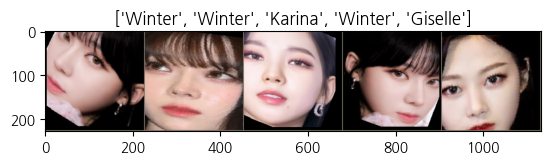

In [16]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

데이터 클래스 확인

In [17]:
print(train_datasets.classes)

['Giselle', 'Karina', 'NingNing', 'Winter']


training

In [18]:
model = models.resnet50(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 3개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 4)

# Dropout 추가
model.dropout = nn.Dropout(0.3)  # 50%의 확률로 뉴런을 무작위로 비활성화합니다.

# Batch Normalization 추가
model.batchnorm = nn.BatchNorm1d(num_features)  # 입력 피쳐의 갯수에 따라 Batch Normalization을 적용합니다.
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 239MB/s]


In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def evaluate(model, criterion, dataloader, device):
    model.eval()
    running_loss = 0.
    running_corrects = 0
    y_true, y_pred = [], []
    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        y_true += labels.cpu().numpy().tolist()
        y_pred += preds.cpu().numpy().tolist()

    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = running_corrects / len(dataloader.dataset) * 100.
    conf_mat = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, target_names=class_names)
    acc = accuracy_score(y_true, y_pred)

    print('Confusion Matrix:')
    print(conf_mat)
    print('Classification Report:')
    print(class_report)

    return epoch_loss, epoch_acc


In [20]:
from torch.optim.lr_scheduler import StepLR

# 학습률 스케줄러 정의
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

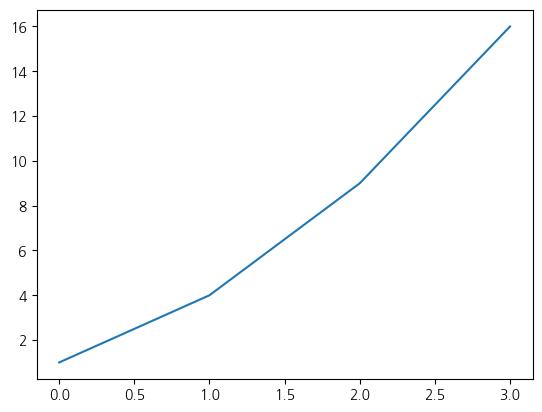

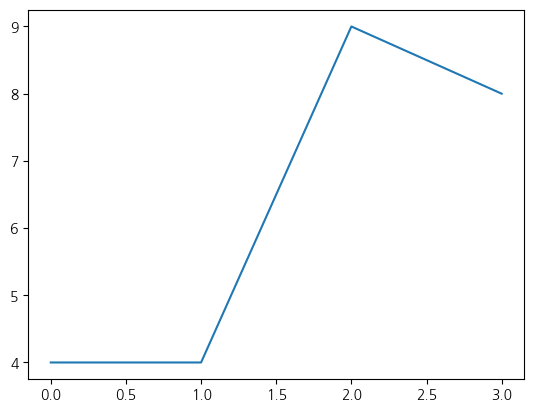

In [21]:
import matplotlib.pyplot as plt

plt.plot(range(4), [1, 4, 9, 16])
plt.show()
plt.plot(range(4), [4, 4, 9, 8])
plt.show()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 3 0 1]
 [0 4 0 1]
 [0 1 4 0]
 [0 4 0 1]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       1.00      0.20      0.33         5
      Karina       0.33      0.80      0.47         5
    NingNing       1.00      0.80      0.89         5
      Winter       0.33      0.20      0.25         5

    accuracy                           0.50        20
   macro avg       0.67      0.50      0.49        20
weighted avg       0.67      0.50      0.49        20

Epoch [1/50], Train Loss: 1.0760, Train Acc: 53.1250%, Val Loss: 1.3626, Val Acc: 50.0000%
Training complete in 0m 15s
Best Validation Accuracy: 50.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[0 5 0 0]
 [0 5 0 0]
 [0 5 0 0]
 [0 4 0 1]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.00      0.00      0.00         5
      Karina       0.26      1.00      0.42         5
    NingNing       0.00      0.00      0.00         5
      Winter       1.00      0.20      0.33         5

    accuracy                           0.30        20
   macro avg       0.32      0.30      0.19        20
weighted avg       0.32      0.30      0.19        20

Epoch [2/50], Train Loss: 1.4268, Train Acc: 31.4583%, Val Loss: 1.3859, Val Acc: 30.0000%
Training complete in 0m 21s
Best Validation Accuracy: 50.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

Confusion Matrix:
[[2 1 1 1]
 [3 2 0 0]
 [1 2 2 0]
 [2 1 0 2]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.25      0.40      0.31         5
      Karina       0.33      0.40      0.36         5
    NingNing       0.67      0.40      0.50         5
      Winter       0.67      0.40      0.50         5

    accuracy                           0.40        20
   macro avg       0.48      0.40      0.42        20
weighted avg       0.48      0.40      0.42        20

Epoch [3/50], Train Loss: 1.0816, Train Acc: 55.0000%, Val Loss: 1.3246, Val Acc: 40.0000%
Training complete in 0m 29s
Best Validation Accuracy: 50.0000


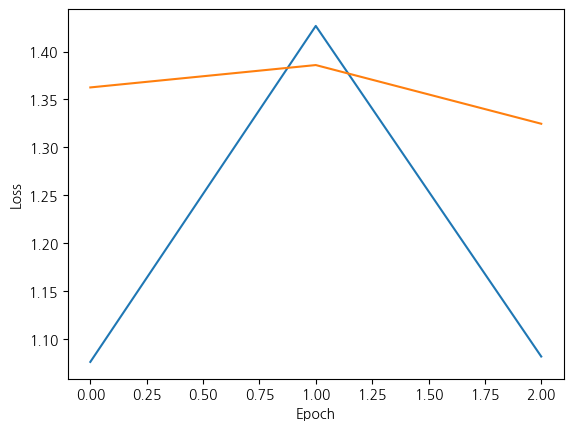

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[0 3 1 1]
 [0 4 1 0]
 [0 1 4 0]
 [0 3 1 1]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.00      0.00      0.00         5
      Karina       0.36      0.80      0.50         5
    NingNing       0.57      0.80      0.67         5
      Winter       0.50      0.20      0.29         5

    accuracy                           0.45        20
   macro avg       0.36      0.45      0.36        20
weighted avg       0.36      0.45      0.36        20

Epoch [4/50], Train Loss: 1.4439, Train Acc: 30.4167%, Val Loss: 1.3680, Val Acc: 45.0000%
Training complete in 0m 35s
Best Validation Accuracy: 50.0000


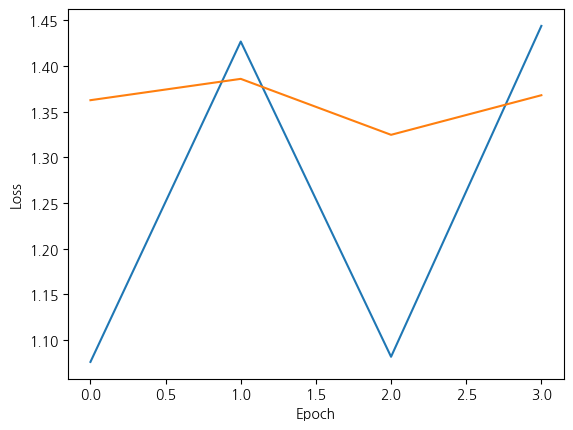

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[0 1 2 2]
 [0 3 2 0]
 [0 0 5 0]
 [1 2 1 1]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.00      0.00      0.00         5
      Karina       0.50      0.60      0.55         5
    NingNing       0.50      1.00      0.67         5
      Winter       0.33      0.20      0.25         5

    accuracy                           0.45        20
   macro avg       0.33      0.45      0.37        20
weighted avg       0.33      0.45      0.37        20

Epoch [5/50], Train Loss: 1.2545, Train Acc: 48.3333%, Val Loss: 1.4500, Val Acc: 45.0000%
Training complete in 0m 43s
Best Validation Accuracy: 50.0000


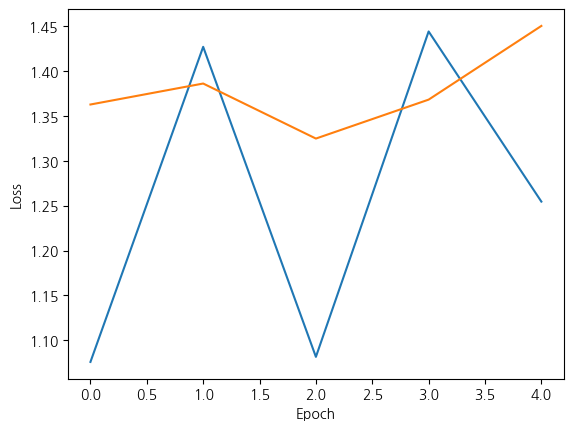

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[0 1 3 1]
 [0 3 2 0]
 [0 0 5 0]
 [0 2 1 2]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.00      0.00      0.00         5
      Karina       0.50      0.60      0.55         5
    NingNing       0.45      1.00      0.62         5
      Winter       0.67      0.40      0.50         5

    accuracy                           0.50        20
   macro avg       0.41      0.50      0.42        20
weighted avg       0.41      0.50      0.42        20

Epoch [6/50], Train Loss: 1.3607, Train Acc: 34.5833%, Val Loss: 1.2885, Val Acc: 50.0000%
Training complete in 0m 49s
Best Validation Accuracy: 50.0000


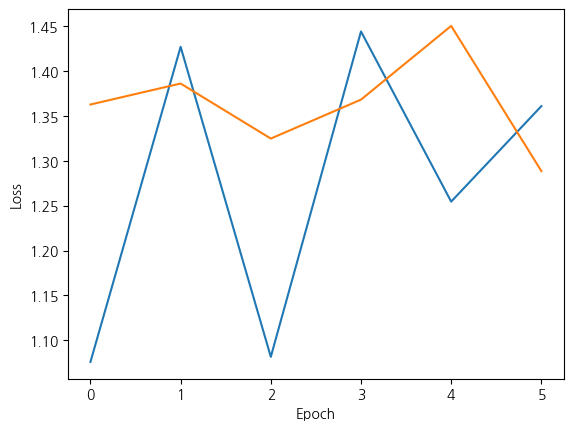

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[0 5 0 0]
 [0 5 0 0]
 [0 5 0 0]
 [0 5 0 0]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.00      0.00      0.00         5
      Karina       0.25      1.00      0.40         5
    NingNing       0.00      0.00      0.00         5
      Winter       0.00      0.00      0.00         5

    accuracy                           0.25        20
   macro avg       0.06      0.25      0.10        20
weighted avg       0.06      0.25      0.10        20

Epoch [7/50], Train Loss: 1.4281, Train Acc: 30.2083%, Val Loss: 1.4047, Val Acc: 25.0000%
Training complete in 0m 57s
Best Validation Accuracy: 50.0000


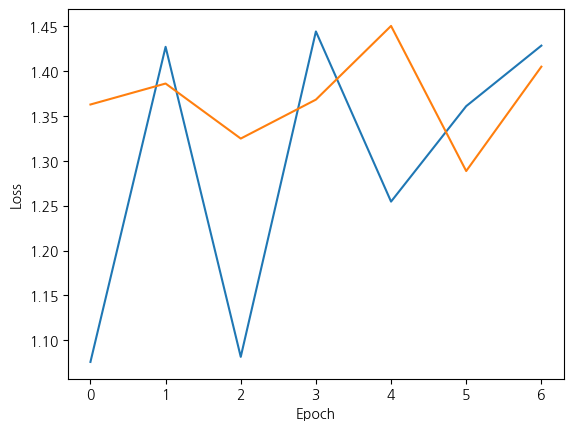

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[0 2 1 2]
 [0 3 2 0]
 [0 0 5 0]
 [0 2 1 2]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.00      0.00      0.00         5
      Karina       0.43      0.60      0.50         5
    NingNing       0.56      1.00      0.71         5
      Winter       0.50      0.40      0.44         5

    accuracy                           0.50        20
   macro avg       0.37      0.50      0.41        20
weighted avg       0.37      0.50      0.41        20

Epoch [8/50], Train Loss: 1.0881, Train Acc: 55.0000%, Val Loss: 1.2472, Val Acc: 50.0000%
Training complete in 1m 3s
Best Validation Accuracy: 50.0000


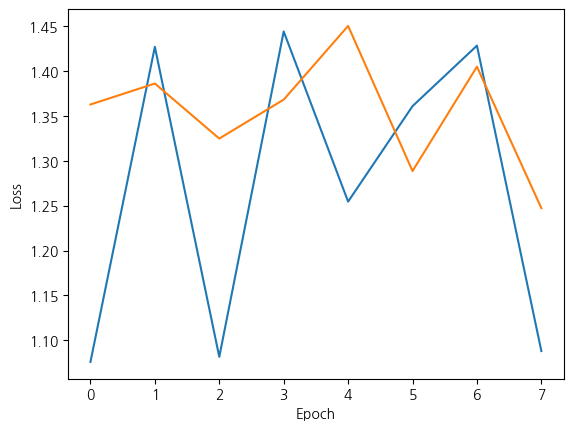

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[5 0 0 0]
 [4 1 0 0]
 [5 0 0 0]
 [5 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.26      1.00      0.42         5
      Karina       1.00      0.20      0.33         5
    NingNing       0.00      0.00      0.00         5
      Winter       0.00      0.00      0.00         5

    accuracy                           0.30        20
   macro avg       0.32      0.30      0.19        20
weighted avg       0.32      0.30      0.19        20

Epoch [9/50], Train Loss: 1.3772, Train Acc: 38.3333%, Val Loss: 1.5048, Val Acc: 30.0000%
Training complete in 1m 11s
Best Validation Accuracy: 50.0000


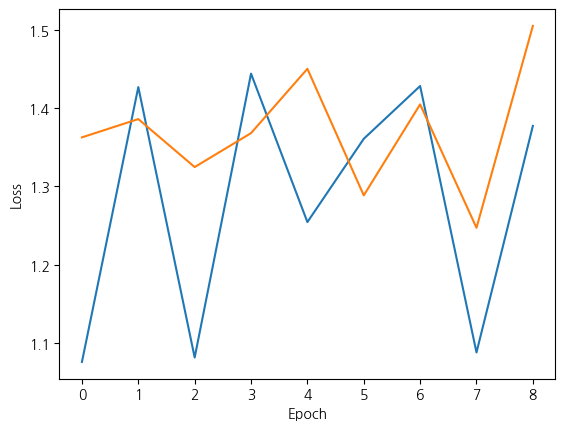

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[5 0 0 0]
 [5 0 0 0]
 [5 0 0 0]
 [5 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.25      1.00      0.40         5
      Karina       0.00      0.00      0.00         5
    NingNing       0.00      0.00      0.00         5
      Winter       0.00      0.00      0.00         5

    accuracy                           0.25        20
   macro avg       0.06      0.25      0.10        20
weighted avg       0.06      0.25      0.10        20

Epoch [10/50], Train Loss: 1.3329, Train Acc: 37.2917%, Val Loss: 1.4260, Val Acc: 25.0000%
Training complete in 1m 18s
Best Validation Accuracy: 50.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


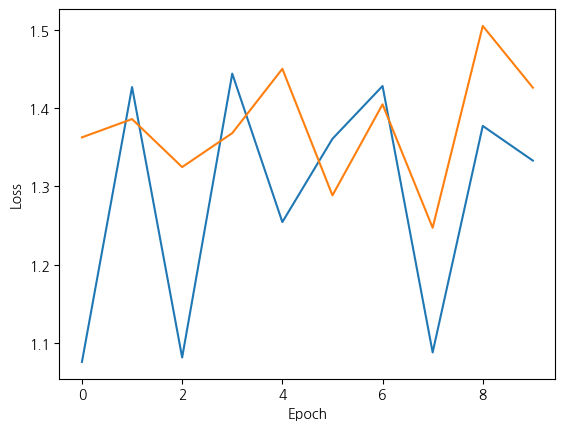

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[0 1 1 3]
 [0 3 2 0]
 [0 0 5 0]
 [0 2 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.00      0.00      0.00         5
      Karina       0.50      0.60      0.55         5
    NingNing       0.62      1.00      0.77         5
      Winter       0.50      0.60      0.55         5

    accuracy                           0.55        20
   macro avg       0.41      0.55      0.47        20
weighted avg       0.41      0.55      0.47        20

Epoch [11/50], Train Loss: 0.2844, Train Acc: 90.4167%, Val Loss: 1.7019, Val Acc: 55.0000%
Training complete in 1m 25s
Best Validation Accuracy: 55.0000


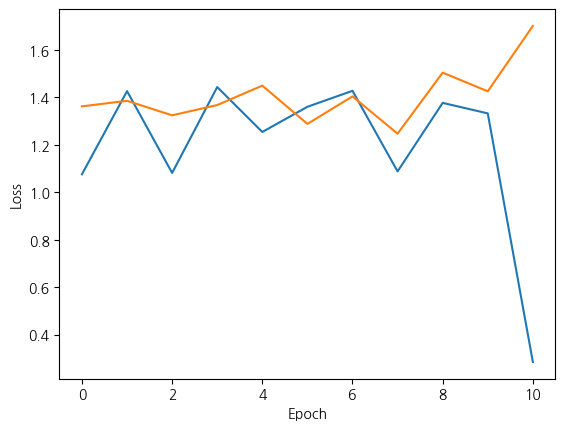

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 1 0 3]
 [0 4 0 1]
 [0 1 4 0]
 [1 2 0 2]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.50      0.80      0.62         5
    NingNing       1.00      0.80      0.89         5
      Winter       0.33      0.40      0.36         5

    accuracy                           0.55        20
   macro avg       0.58      0.55      0.54        20
weighted avg       0.58      0.55      0.54        20

Epoch [12/50], Train Loss: 0.1138, Train Acc: 96.0417%, Val Loss: 1.3777, Val Acc: 55.0000%
Training complete in 1m 32s
Best Validation Accuracy: 55.0000


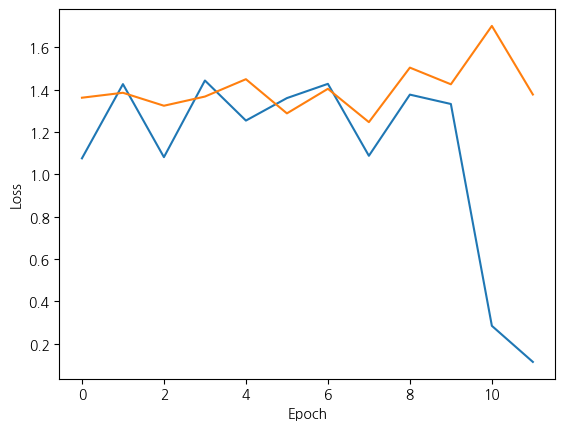

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 3 1 1]
 [0 0 5 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.75      0.60      0.67         5
    NingNing       0.71      1.00      0.83         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.57        20
weighted avg       0.60      0.60      0.57        20

Epoch [13/50], Train Loss: 0.0654, Train Acc: 97.2917%, Val Loss: 2.1552, Val Acc: 60.0000%
Training complete in 1m 40s
Best Validation Accuracy: 60.0000


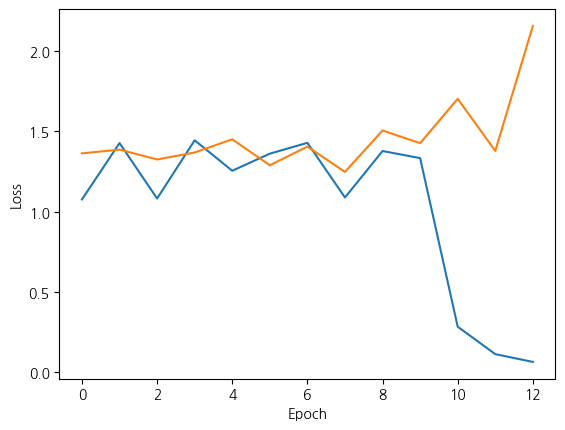

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 1 4 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.67      0.80      0.73         5
    NingNing       0.80      0.80      0.80         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.58        20
weighted avg       0.60      0.60      0.58        20

Epoch [14/50], Train Loss: 0.0294, Train Acc: 98.9583%, Val Loss: 2.0247, Val Acc: 60.0000%
Training complete in 1m 47s
Best Validation Accuracy: 60.0000


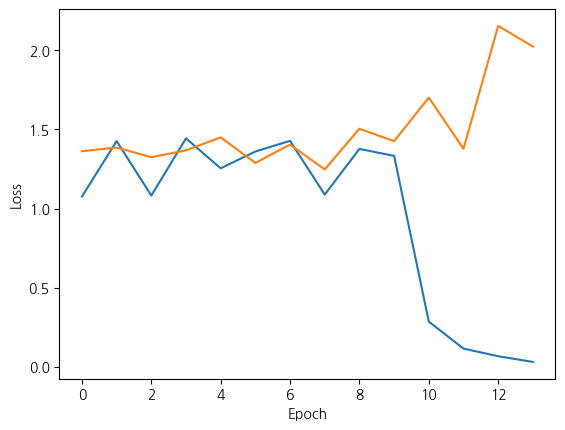

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[0 0 1 4]
 [0 4 0 1]
 [0 2 3 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.00      0.00      0.00         5
      Karina       0.57      0.80      0.67         5
    NingNing       0.75      0.60      0.67         5
      Winter       0.38      0.60      0.46         5

    accuracy                           0.50        20
   macro avg       0.42      0.50      0.45        20
weighted avg       0.42      0.50      0.45        20

Epoch [15/50], Train Loss: 0.0849, Train Acc: 97.0833%, Val Loss: 2.0515, Val Acc: 50.0000%
Training complete in 1m 54s
Best Validation Accuracy: 60.0000


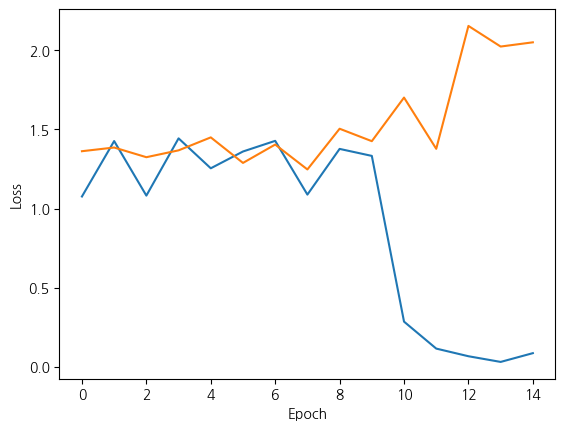

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 1 0 3]
 [0 4 0 1]
 [0 1 4 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.57      0.80      0.67         5
    NingNing       1.00      0.80      0.89         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.60        20
   macro avg       0.62      0.60      0.59        20
weighted avg       0.62      0.60      0.59        20

Epoch [16/50], Train Loss: 0.1408, Train Acc: 94.5833%, Val Loss: 1.7977, Val Acc: 60.0000%
Training complete in 2m 1s
Best Validation Accuracy: 60.0000


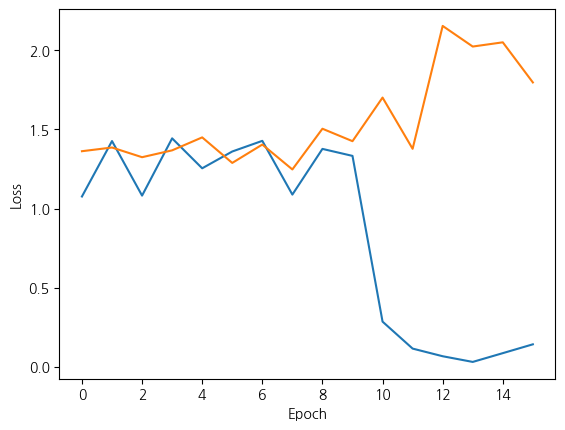

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[0 0 1 4]
 [0 4 0 1]
 [0 1 4 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.00      0.00      0.00         5
      Karina       0.67      0.80      0.73         5
    NingNing       0.80      0.80      0.80         5
      Winter       0.38      0.60      0.46         5

    accuracy                           0.55        20
   macro avg       0.46      0.55      0.50        20
weighted avg       0.46      0.55      0.50        20

Epoch [17/50], Train Loss: 0.0379, Train Acc: 98.9583%, Val Loss: 2.1108, Val Acc: 55.0000%
Training complete in 2m 9s
Best Validation Accuracy: 60.0000


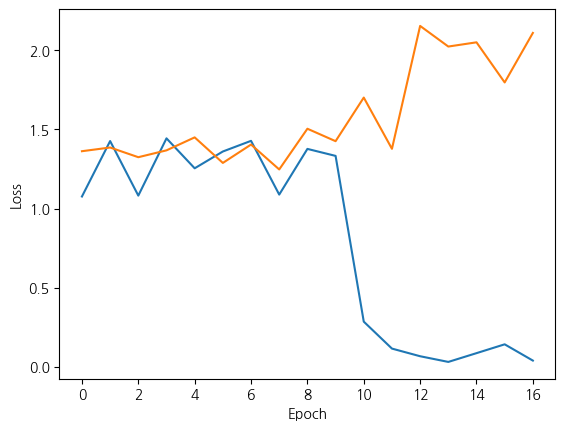

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[0 0 1 4]
 [0 4 0 1]
 [0 0 5 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.00      0.00      0.00         5
      Karina       0.80      0.80      0.80         5
    NingNing       0.83      1.00      0.91         5
      Winter       0.38      0.60      0.46         5

    accuracy                           0.60        20
   macro avg       0.50      0.60      0.54        20
weighted avg       0.50      0.60      0.54        20

Epoch [18/50], Train Loss: 0.0537, Train Acc: 98.1250%, Val Loss: 2.1678, Val Acc: 60.0000%
Training complete in 2m 16s
Best Validation Accuracy: 60.0000


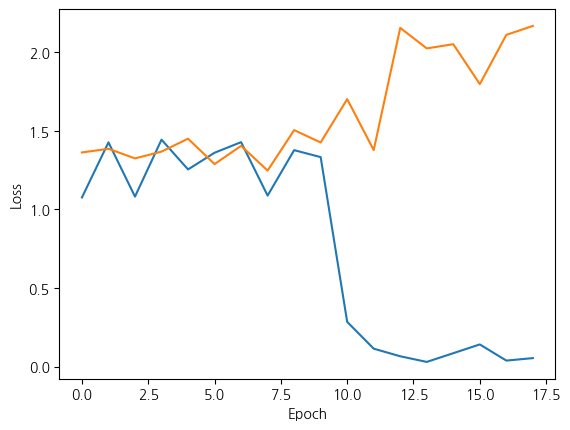

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 1 1 2]
 [0 4 0 1]
 [0 1 4 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.57      0.80      0.67         5
    NingNing       0.80      0.80      0.80         5
      Winter       0.50      0.60      0.55         5

    accuracy                           0.60        20
   macro avg       0.59      0.60      0.57        20
weighted avg       0.59      0.60      0.57        20

Epoch [19/50], Train Loss: 0.1092, Train Acc: 96.0417%, Val Loss: 1.9119, Val Acc: 60.0000%
Training complete in 2m 23s
Best Validation Accuracy: 60.0000


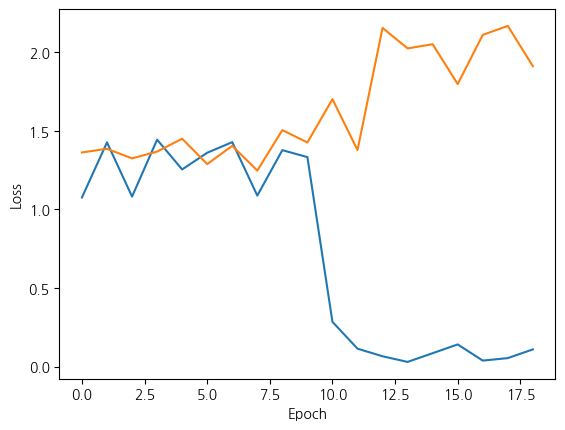

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 1 0 3]
 [0 5 0 0]
 [0 2 3 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.56      1.00      0.71         5
    NingNing       1.00      0.60      0.75         5
      Winter       0.50      0.60      0.55         5

    accuracy                           0.60        20
   macro avg       0.64      0.60      0.57        20
weighted avg       0.64      0.60      0.57        20

Epoch [20/50], Train Loss: 0.1175, Train Acc: 96.6667%, Val Loss: 2.0297, Val Acc: 60.0000%
Training complete in 2m 30s
Best Validation Accuracy: 60.0000


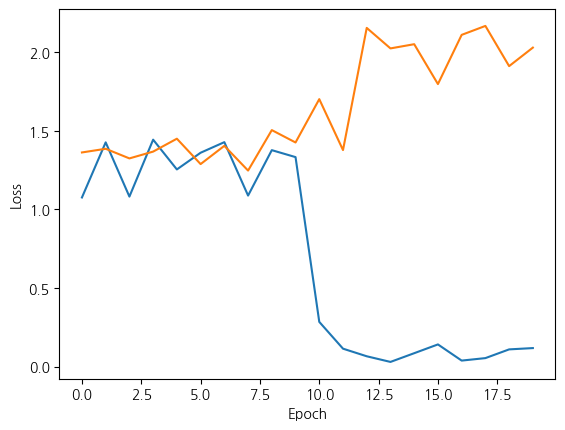

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 2 3 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.57      0.80      0.67         5
    NingNing       0.75      0.60      0.67         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.55        20
   macro avg       0.56      0.55      0.53        20
weighted avg       0.56      0.55      0.53        20

Epoch [21/50], Train Loss: 0.0365, Train Acc: 98.5417%, Val Loss: 2.2923, Val Acc: 55.0000%
Training complete in 2m 38s
Best Validation Accuracy: 60.0000


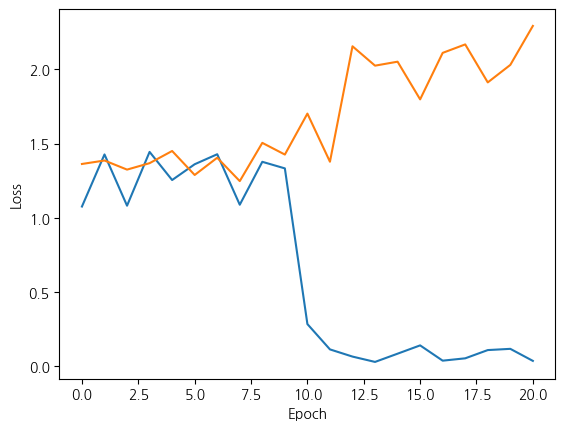

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 1 4 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.67      0.80      0.73         5
    NingNing       0.80      0.80      0.80         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.58        20
weighted avg       0.60      0.60      0.58        20

Epoch [22/50], Train Loss: 0.0319, Train Acc: 98.9583%, Val Loss: 2.1798, Val Acc: 60.0000%
Training complete in 2m 45s
Best Validation Accuracy: 60.0000


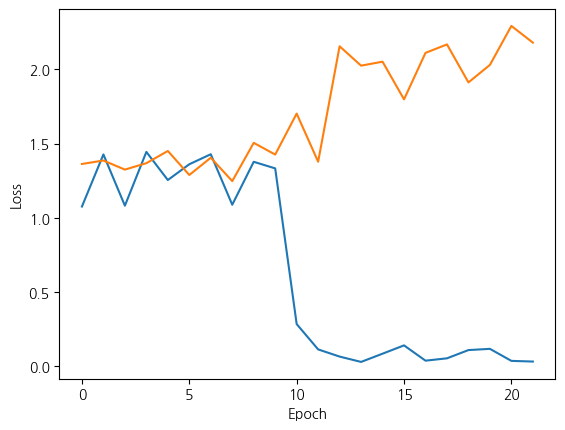

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 1 4 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.67      0.80      0.73         5
    NingNing       0.80      0.80      0.80         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.58        20
weighted avg       0.60      0.60      0.58        20

Epoch [23/50], Train Loss: 0.0455, Train Acc: 98.3333%, Val Loss: 2.0943, Val Acc: 60.0000%
Training complete in 2m 53s
Best Validation Accuracy: 60.0000


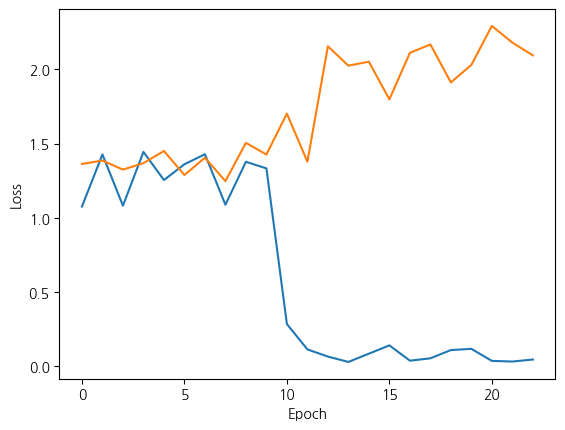

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 1 4 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.67      0.80      0.73         5
    NingNing       0.80      0.80      0.80         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.58        20
weighted avg       0.60      0.60      0.58        20

Epoch [24/50], Train Loss: 0.0358, Train Acc: 98.7500%, Val Loss: 2.0943, Val Acc: 60.0000%
Training complete in 3m 0s
Best Validation Accuracy: 60.0000


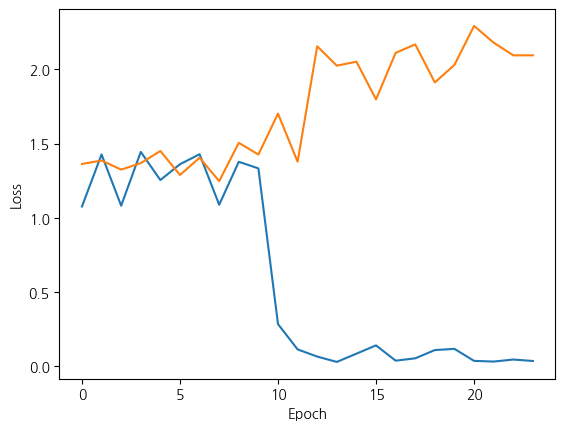

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 1 4 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.67      0.80      0.73         5
    NingNing       0.80      0.80      0.80         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.58        20
weighted avg       0.60      0.60      0.58        20

Epoch [25/50], Train Loss: 0.0268, Train Acc: 99.3750%, Val Loss: 2.1692, Val Acc: 60.0000%
Training complete in 3m 8s
Best Validation Accuracy: 60.0000


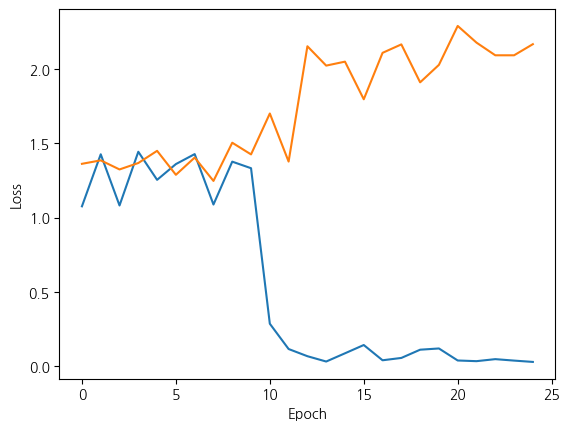

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 1 4 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.67      0.80      0.73         5
    NingNing       0.80      0.80      0.80         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.58        20
weighted avg       0.60      0.60      0.58        20

Epoch [26/50], Train Loss: 0.0304, Train Acc: 98.9583%, Val Loss: 2.1229, Val Acc: 60.0000%
Training complete in 3m 15s
Best Validation Accuracy: 60.0000


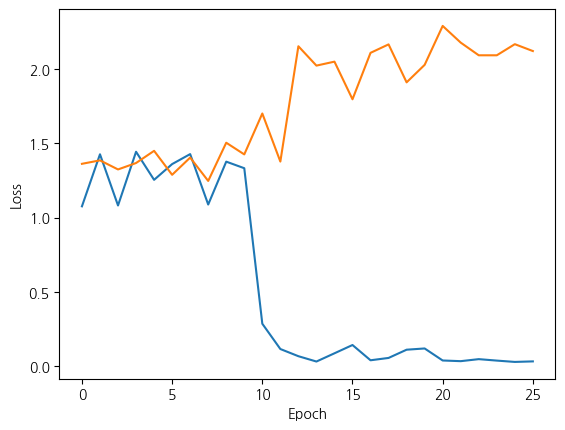

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 2 3 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.57      0.80      0.67         5
    NingNing       0.75      0.60      0.67         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.55        20
   macro avg       0.56      0.55      0.53        20
weighted avg       0.56      0.55      0.53        20

Epoch [27/50], Train Loss: 0.0431, Train Acc: 98.5417%, Val Loss: 2.1912, Val Acc: 55.0000%
Training complete in 3m 23s
Best Validation Accuracy: 60.0000


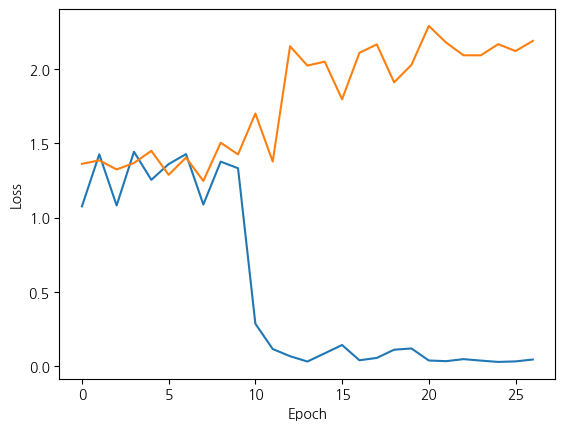

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 1 4 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.67      0.80      0.73         5
    NingNing       0.80      0.80      0.80         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.58        20
weighted avg       0.60      0.60      0.58        20

Epoch [28/50], Train Loss: 0.0343, Train Acc: 98.9583%, Val Loss: 2.0903, Val Acc: 60.0000%
Training complete in 3m 30s
Best Validation Accuracy: 60.0000


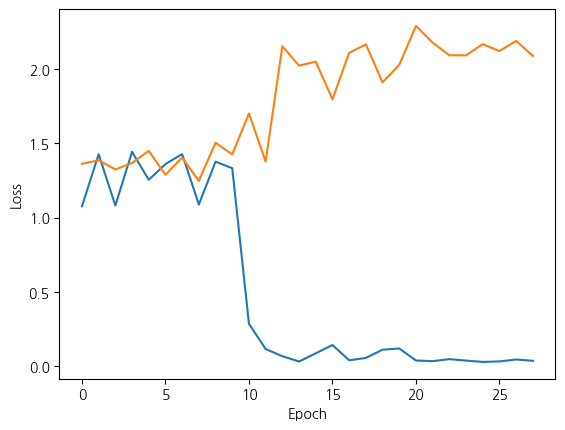

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 0 5 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.80      0.80      0.80         5
    NingNing       0.83      1.00      0.91         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.65        20
   macro avg       0.64      0.65      0.62        20
weighted avg       0.64      0.65      0.62        20

Epoch [29/50], Train Loss: 0.0222, Train Acc: 99.5833%, Val Loss: 2.1177, Val Acc: 65.0000%
Training complete in 3m 39s
Best Validation Accuracy: 65.0000


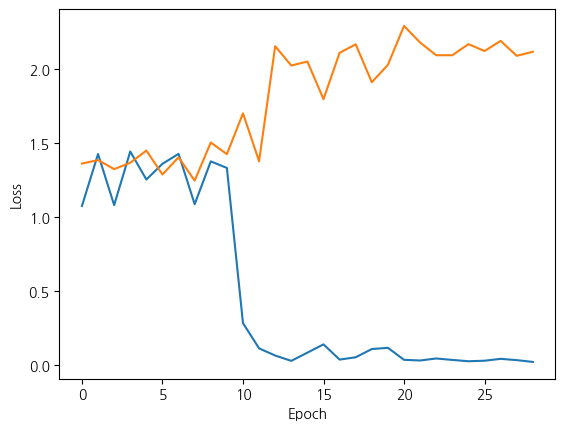

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 1 4 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.67      0.80      0.73         5
    NingNing       0.80      0.80      0.80         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.58        20
weighted avg       0.60      0.60      0.58        20

Epoch [30/50], Train Loss: 0.0202, Train Acc: 99.5833%, Val Loss: 2.1929, Val Acc: 60.0000%
Training complete in 3m 46s
Best Validation Accuracy: 65.0000


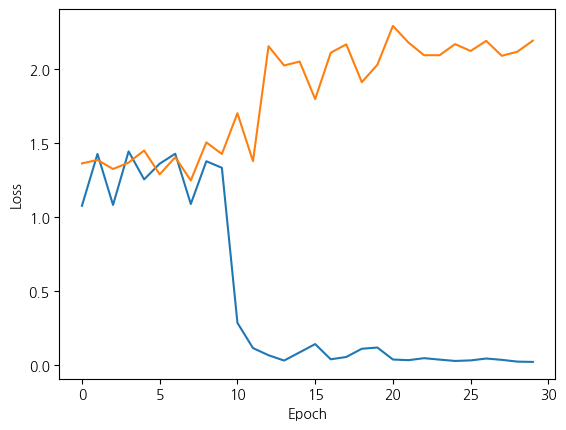

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 1 4 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.67      0.80      0.73         5
    NingNing       0.80      0.80      0.80         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.58        20
weighted avg       0.60      0.60      0.58        20

Epoch [31/50], Train Loss: 0.0267, Train Acc: 98.9583%, Val Loss: 2.1239, Val Acc: 60.0000%
Training complete in 3m 54s
Best Validation Accuracy: 65.0000


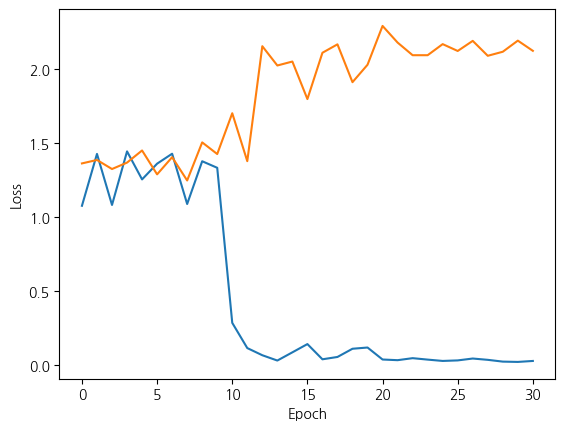

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 1 4 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.67      0.80      0.73         5
    NingNing       0.80      0.80      0.80         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.58        20
weighted avg       0.60      0.60      0.58        20

Epoch [32/50], Train Loss: 0.0226, Train Acc: 99.1667%, Val Loss: 2.1181, Val Acc: 60.0000%
Training complete in 4m 1s
Best Validation Accuracy: 65.0000


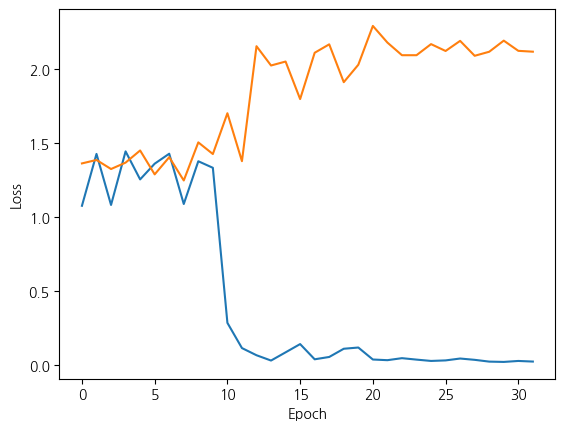

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 1 4 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.67      0.80      0.73         5
    NingNing       0.80      0.80      0.80         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.58        20
weighted avg       0.60      0.60      0.58        20

Epoch [33/50], Train Loss: 0.0177, Train Acc: 99.7917%, Val Loss: 2.1167, Val Acc: 60.0000%
Training complete in 4m 9s
Best Validation Accuracy: 65.0000


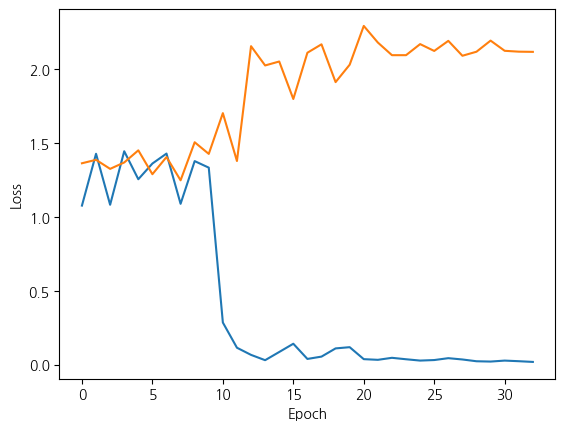

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 1 4 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.67      0.80      0.73         5
    NingNing       0.80      0.80      0.80         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.58        20
weighted avg       0.60      0.60      0.58        20

Epoch [34/50], Train Loss: 0.0206, Train Acc: 99.7917%, Val Loss: 2.1259, Val Acc: 60.0000%
Training complete in 4m 16s
Best Validation Accuracy: 65.0000


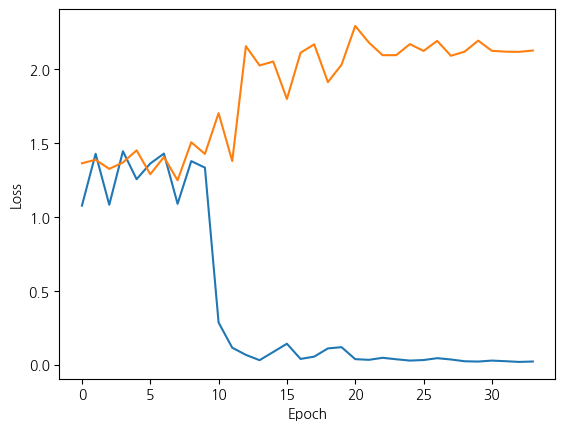

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 1 4 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.67      0.80      0.73         5
    NingNing       0.80      0.80      0.80         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.58        20
weighted avg       0.60      0.60      0.58        20

Epoch [35/50], Train Loss: 0.0183, Train Acc: 99.5833%, Val Loss: 2.1226, Val Acc: 60.0000%
Training complete in 4m 24s
Best Validation Accuracy: 65.0000


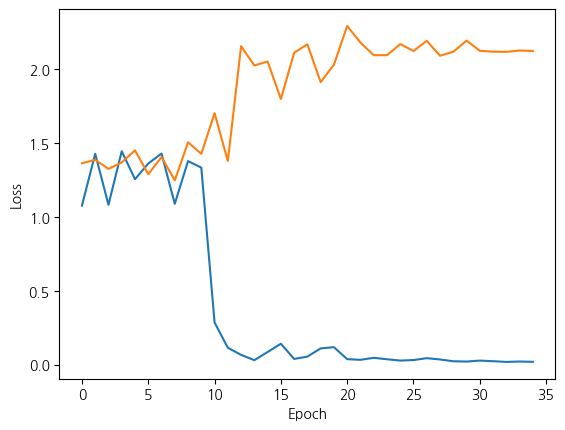

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 1 4 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.67      0.80      0.73         5
    NingNing       0.80      0.80      0.80         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.58        20
weighted avg       0.60      0.60      0.58        20

Epoch [36/50], Train Loss: 0.0230, Train Acc: 99.5833%, Val Loss: 2.1179, Val Acc: 60.0000%
Training complete in 4m 31s
Best Validation Accuracy: 65.0000


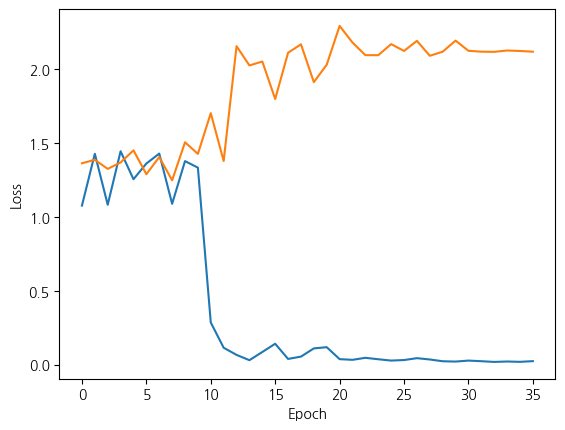

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 1 4 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.67      0.80      0.73         5
    NingNing       0.80      0.80      0.80         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.58        20
weighted avg       0.60      0.60      0.58        20

Epoch [37/50], Train Loss: 0.0213, Train Acc: 99.3750%, Val Loss: 2.1277, Val Acc: 60.0000%
Training complete in 4m 39s
Best Validation Accuracy: 65.0000


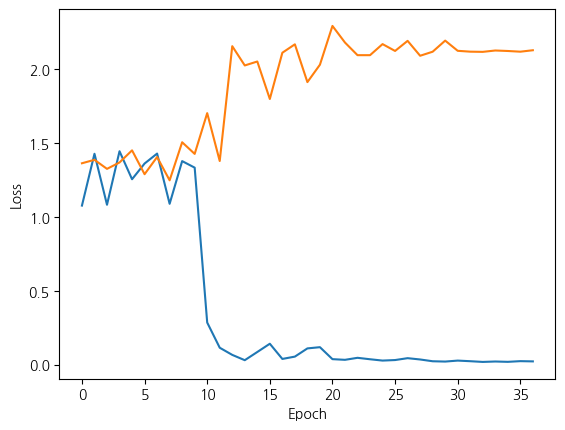

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 1 4 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.67      0.80      0.73         5
    NingNing       0.80      0.80      0.80         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.58        20
weighted avg       0.60      0.60      0.58        20

Epoch [38/50], Train Loss: 0.0239, Train Acc: 99.3750%, Val Loss: 2.1295, Val Acc: 60.0000%
Training complete in 4m 46s
Best Validation Accuracy: 65.0000


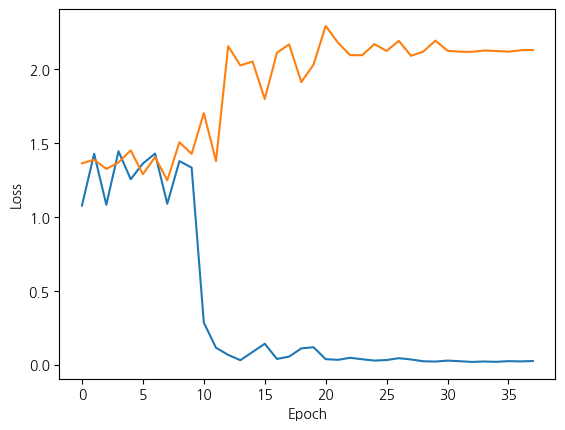

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 1 4 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.67      0.80      0.73         5
    NingNing       0.80      0.80      0.80         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.58        20
weighted avg       0.60      0.60      0.58        20

Epoch [39/50], Train Loss: 0.0249, Train Acc: 99.3750%, Val Loss: 2.1206, Val Acc: 60.0000%
Training complete in 4m 55s
Best Validation Accuracy: 65.0000


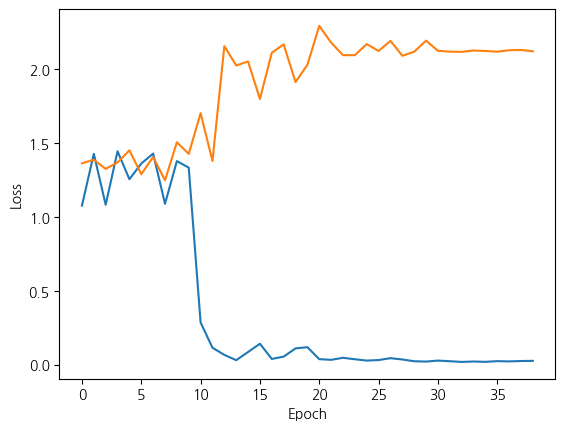

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 1 4 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.67      0.80      0.73         5
    NingNing       0.80      0.80      0.80         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.58        20
weighted avg       0.60      0.60      0.58        20

Epoch [40/50], Train Loss: 0.0153, Train Acc: 99.7917%, Val Loss: 2.1286, Val Acc: 60.0000%
Training complete in 5m 1s
Best Validation Accuracy: 65.0000


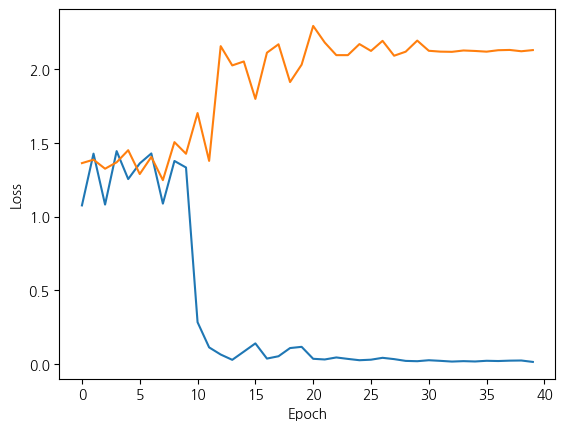

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 0 5 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.80      0.80      0.80         5
    NingNing       0.83      1.00      0.91         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.65        20
   macro avg       0.64      0.65      0.62        20
weighted avg       0.64      0.65      0.62        20

Epoch [41/50], Train Loss: 0.0294, Train Acc: 99.1667%, Val Loss: 2.1181, Val Acc: 65.0000%
Training complete in 5m 10s
Best Validation Accuracy: 65.0000


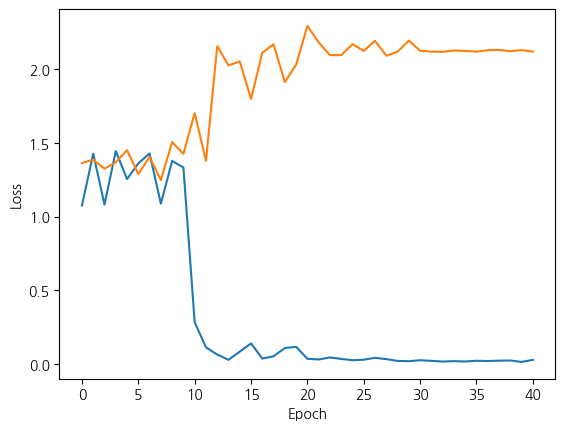

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 0 5 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.80      0.80      0.80         5
    NingNing       0.83      1.00      0.91         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.65        20
   macro avg       0.64      0.65      0.62        20
weighted avg       0.64      0.65      0.62        20

Epoch [42/50], Train Loss: 0.0252, Train Acc: 99.3750%, Val Loss: 2.1188, Val Acc: 65.0000%
Training complete in 5m 17s
Best Validation Accuracy: 65.0000


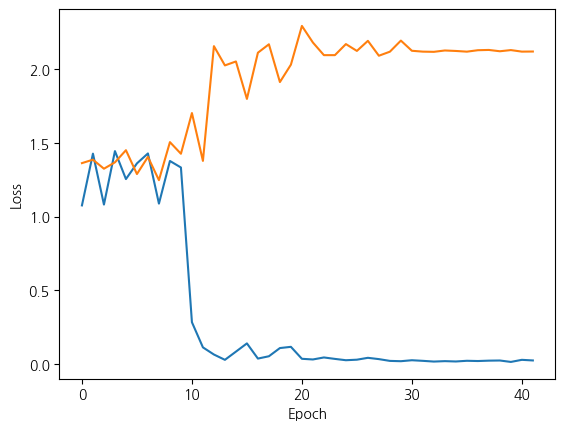

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 1 4 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.67      0.80      0.73         5
    NingNing       0.80      0.80      0.80         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.58        20
weighted avg       0.60      0.60      0.58        20

Epoch [43/50], Train Loss: 0.0278, Train Acc: 98.9583%, Val Loss: 2.1181, Val Acc: 60.0000%
Training complete in 5m 25s
Best Validation Accuracy: 65.0000


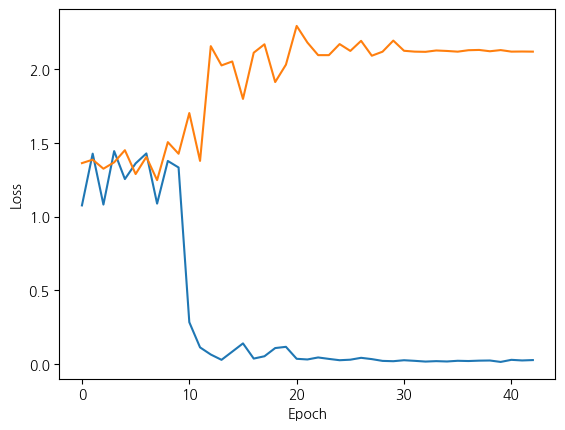

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 0 5 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.80      0.80      0.80         5
    NingNing       0.83      1.00      0.91         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.65        20
   macro avg       0.64      0.65      0.62        20
weighted avg       0.64      0.65      0.62        20

Epoch [44/50], Train Loss: 0.0181, Train Acc: 99.7917%, Val Loss: 2.1182, Val Acc: 65.0000%
Training complete in 5m 32s
Best Validation Accuracy: 65.0000


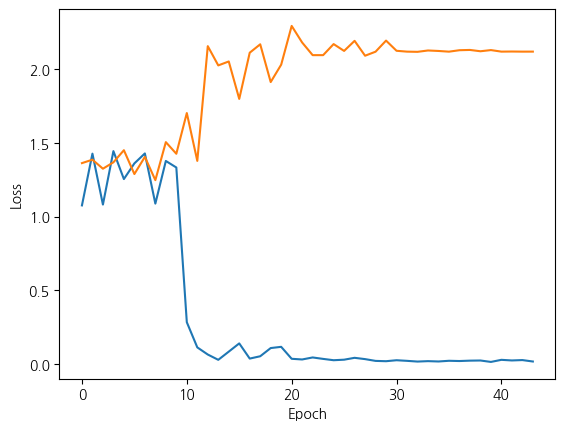

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 0 5 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.80      0.80      0.80         5
    NingNing       0.83      1.00      0.91         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.65        20
   macro avg       0.64      0.65      0.62        20
weighted avg       0.64      0.65      0.62        20

Epoch [45/50], Train Loss: 0.0280, Train Acc: 98.9583%, Val Loss: 2.1175, Val Acc: 65.0000%
Training complete in 5m 40s
Best Validation Accuracy: 65.0000


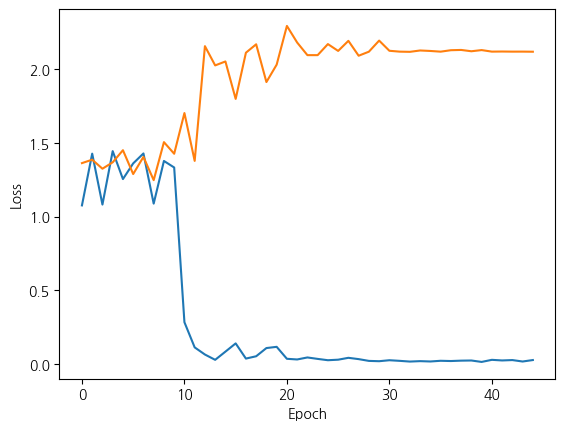

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 0 5 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.80      0.80      0.80         5
    NingNing       0.83      1.00      0.91         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.65        20
   macro avg       0.64      0.65      0.62        20
weighted avg       0.64      0.65      0.62        20

Epoch [46/50], Train Loss: 0.0250, Train Acc: 99.3750%, Val Loss: 2.1176, Val Acc: 65.0000%
Training complete in 5m 47s
Best Validation Accuracy: 65.0000


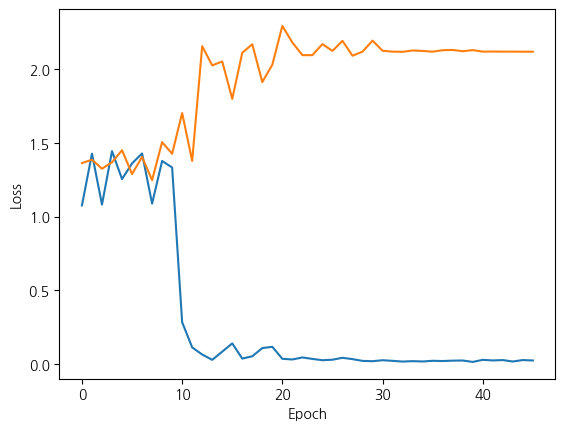

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 0 5 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.80      0.80      0.80         5
    NingNing       0.83      1.00      0.91         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.65        20
   macro avg       0.64      0.65      0.62        20
weighted avg       0.64      0.65      0.62        20

Epoch [47/50], Train Loss: 0.0216, Train Acc: 99.5833%, Val Loss: 2.1186, Val Acc: 65.0000%
Training complete in 5m 55s
Best Validation Accuracy: 65.0000


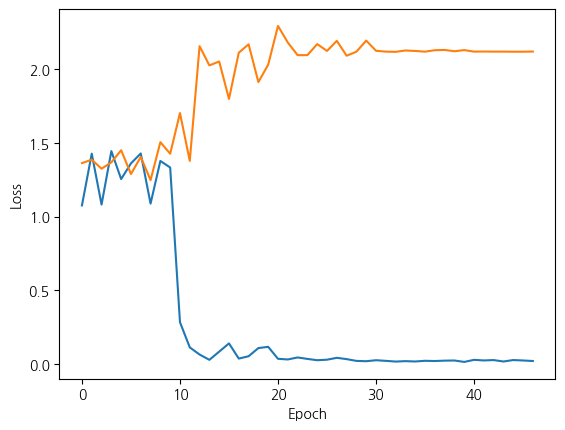

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 0 5 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.80      0.80      0.80         5
    NingNing       0.83      1.00      0.91         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.65        20
   macro avg       0.64      0.65      0.62        20
weighted avg       0.64      0.65      0.62        20

Epoch [48/50], Train Loss: 0.0253, Train Acc: 99.3750%, Val Loss: 2.1164, Val Acc: 65.0000%
Training complete in 6m 2s
Best Validation Accuracy: 65.0000


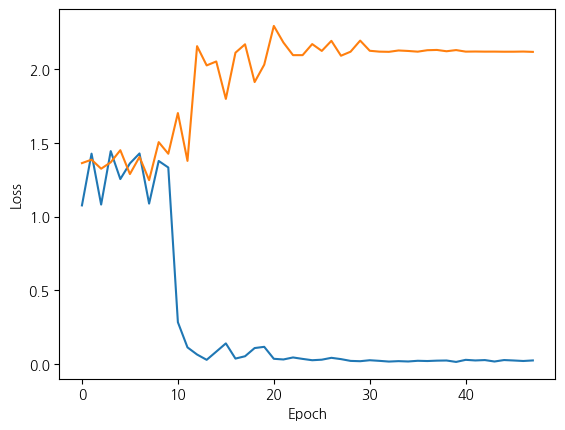

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 0 5 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.80      0.80      0.80         5
    NingNing       0.83      1.00      0.91         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.65        20
   macro avg       0.64      0.65      0.62        20
weighted avg       0.64      0.65      0.62        20

Epoch [49/50], Train Loss: 0.0197, Train Acc: 99.5833%, Val Loss: 2.1174, Val Acc: 65.0000%
Training complete in 6m 11s
Best Validation Accuracy: 65.0000


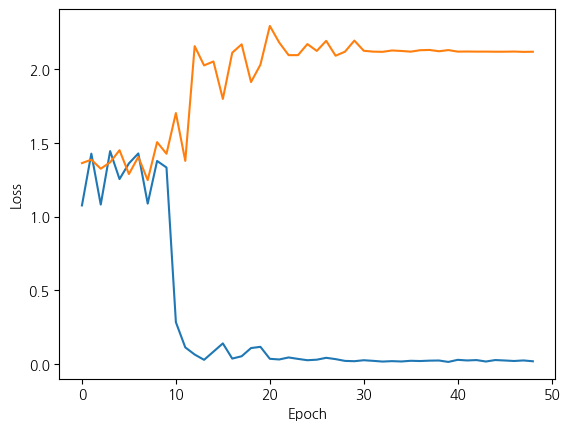

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 1 3]
 [0 4 0 1]
 [0 0 5 0]
 [1 1 0 3]]
Classification Report:
              precision    recall  f1-score   support

     Giselle       0.50      0.20      0.29         5
      Karina       0.80      0.80      0.80         5
    NingNing       0.83      1.00      0.91         5
      Winter       0.43      0.60      0.50         5

    accuracy                           0.65        20
   macro avg       0.64      0.65      0.62        20
weighted avg       0.64      0.65      0.62        20

Epoch [50/50], Train Loss: 0.0166, Train Acc: 99.5833%, Val Loss: 2.1183, Val Acc: 65.0000%
Training complete in 6m 18s
Best Validation Accuracy: 65.0000


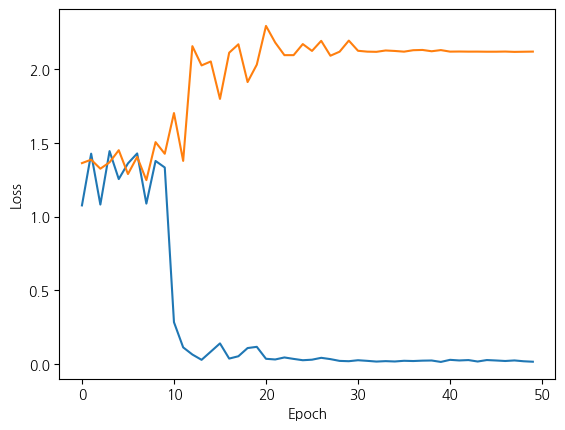

In [22]:
import copy
import time

num_epochs = 50
model.train()
start_time = time.time()
best_acc = -1
train_loss_list = []  # 학습 손실 값 저장을 위한 리스트
train_acc_list = []  # 학습 정확도 저장을 위한 리스트
val_loss_list = []  # 검증 손실 값 저장을 위한 리스트
val_acc_list = []  # 검증 정확도 저장을 위한 리스트

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    # 한 epoch이 끝날 때마다 train loss와 train accuracy 계산
    train_loss = running_loss / len(train_datasets)  # train 손실 값
    train_acc = running_corrects.double() / len(train_datasets)  # train 정확도

    train_loss_list.append(train_loss)  # train 손실 값을 리스트에 저장
    train_acc_list.append(train_acc)  # train 정확도 값을 리스트에 저장

    # 학습률 스케줄러 업데이트
    scheduler.step()

    # validation을 위한 함수 호출
    val_loss, val_acc = evaluate(model, criterion, val_dataloader, device)
    val_loss_list.append(val_loss)  # 검증 손실 값을 리스트에 저장
    val_acc_list.append(val_acc)  # 검증 정확도 값을 리스트에 저장

    # validation 결과 출력
    print('Epoch [{}/{}], Train Loss: {:.4f}, Train Acc: {:.4f}%, Val Loss: {:.4f}, Val Acc: {:.4f}%'.format(
        epoch + 1, num_epochs, train_loss, train_acc * 100, val_loss, val_acc))

    # Best Model 저장
    if val_acc > best_acc:
        best_acc = val_acc
        best_model_wts = copy.deepcopy(model.state_dict())

    end = time.time()
    time_elapsed = end - start_time
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Validation Accuracy: {:.4f}'.format(best_acc))

    # Best Model 불러오기
    model.load_state_dict(best_model_wts)

    if epoch < 2:
      continue

    # Loss 그래프 출력
    plt.plot(train_loss_list, label='Train')
    plt.plot(val_loss_list, label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    plt.legend


0.53125


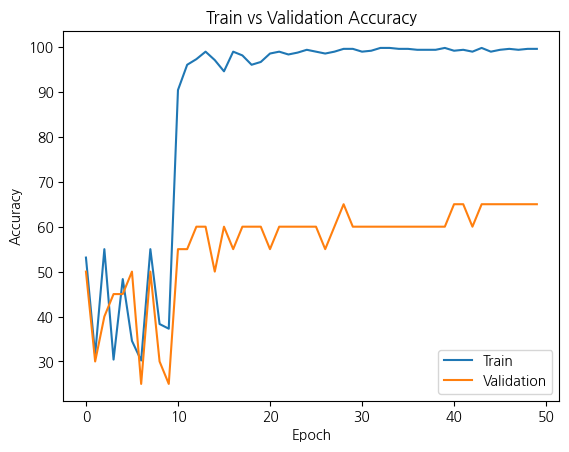

In [23]:
print(train_acc_list[0].item())
result1 = []
result2 = []

for x in train_acc_list:
  result1.append(x.item()*100)
for x in val_acc_list:
  result2.append(x.item())


# Train accuracy와 Validation accuracy 그래프
plt.plot(result1, label='Train')
plt.plot(result2, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.show()


학습한 모델 평가

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[예측 결과: Winter] (실제 정답: Winter)


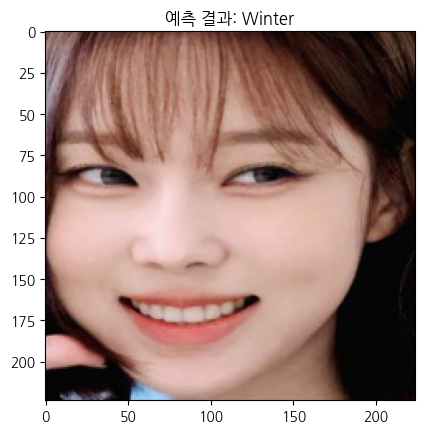

[예측 결과: Karina] (실제 정답: Karina)


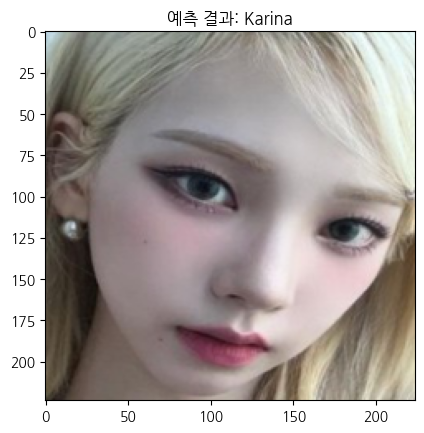

[예측 결과: Winter] (실제 정답: Winter)


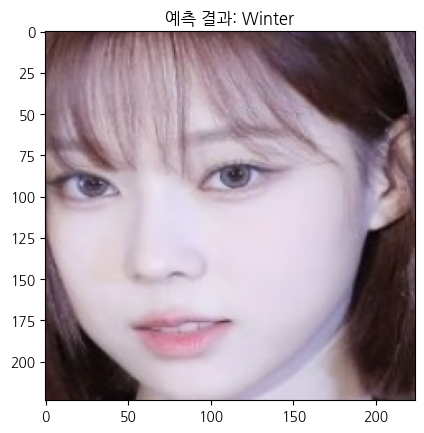

[예측 결과: Giselle] (실제 정답: Giselle)


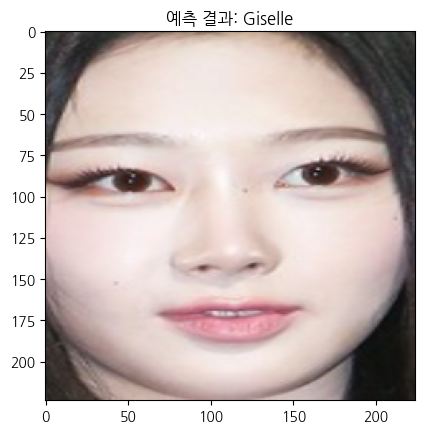

[Test Phase] Loss: 0.9817 Acc: 80.0000% Time: 1.7997s
(20, 4)


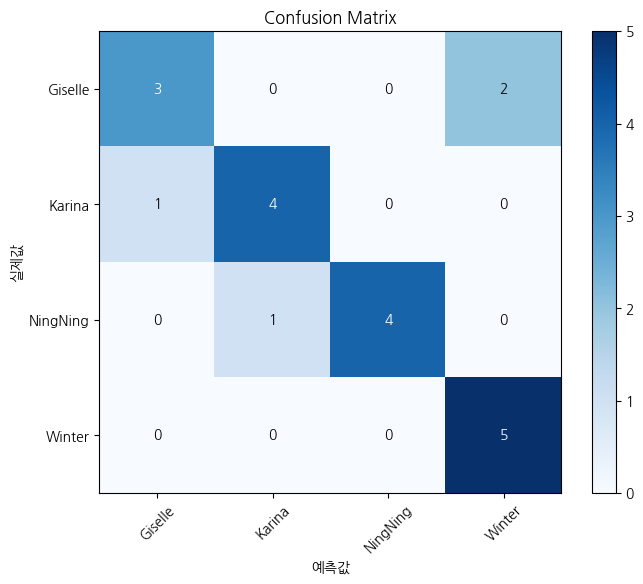

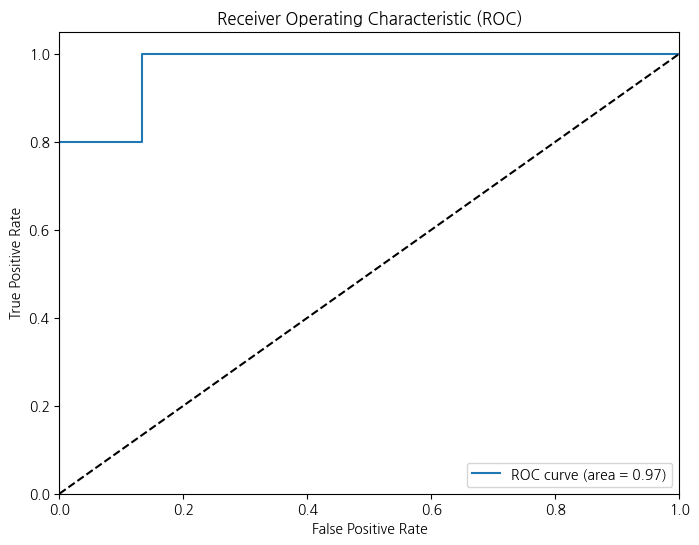

F1 스코어: 0.7972
Precision: 0.8161
Recall: 0.8000
Accuracy: 0.8000


In [24]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score, accuracy_score

# ...

# 모델 평가
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0
    all_preds = []  # 예측 값들을 저장할 리스트
    all_labels = []  # 실제 레이블들을 저장할 리스트
    probs = []  # 확률값을 저장할 리스트

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        all_preds.extend(preds.cpu().numpy())  # 예측 값들을 리스트에 추가
        all_labels.extend(labels.data.cpu().numpy())  # 실제 레이블들을 리스트에 추가

        probs.extend(torch.nn.functional.softmax(outputs, dim=1).cpu().numpy())  # 확률값들을 리스트에 추가

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

    # `probs`와 `all_labels`의 길이를 확인하고 조정
    if len(probs) != len(all_labels):
        print("Error: Number of samples in `probs` and `all_labels` do not match.")
        exit()

    # `probs`의 shape 확인
    probs = np.array(probs)
    print(probs.shape)

# Confusion Matrix 계산
confusion = confusion_matrix(all_labels, all_preds)

# Precision 계산
precision = precision_score(all_labels, all_preds, average='macro')

# Recall 계산
recall = recall_score(all_labels, all_preds, average='macro')

# Accuracy 계산
accuracy = accuracy_score(all_labels, all_preds)

# Confusion Matrix 출력
plt.figure(figsize=(8, 6))
plt.imshow(confusion, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('예측값')
plt.ylabel('실제값')
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, confusion[i, j], ha='center', va='center', color='white' if confusion[i, j] > np.max(confusion) / 2 else 'black')
plt.show()

# ROC Curve 계산 및 그리기
fpr, tpr, thresholds = roc_curve(all_labels, probs[:, 1], pos_label=1)  # ROC Curve 계산
roc_auc = auc(fpr, tpr)  # AUC 계산

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# F1 Score 계산
f1 = f1_score(all_labels, all_preds, average='macro')

print('F1 스코어: {:.4f}'.format(f1))
print('Precision: {:.4f}'.format(precision))
print('Recall: {:.4f}'.format(recall))
print('Accuracy: {:.4f}'.format(accuracy))
